In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/Vigneshwaran/OneDrive/Desktop/patient-readmission-prediction/data/raw/diabetic_data.csv")

# Check first few rows
df.head()

# Data summary
df.info()

# Quick statistical overview
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [3]:
# Check for missing values
df.isnull().sum()


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
print(df['max_glu_serum'].value_counts())
print(df['A1Cresult'].value_counts())


max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64


In [7]:
# Dropping columns due to high missingness
df.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

# Verify the columns dropped
print(df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [9]:
# Save the cleaned dataset after dropping columns
df.to_csv("C:/Users/Vigneshwaran/Downloads/diabetic_data_cleaned.csv", index=False)
    

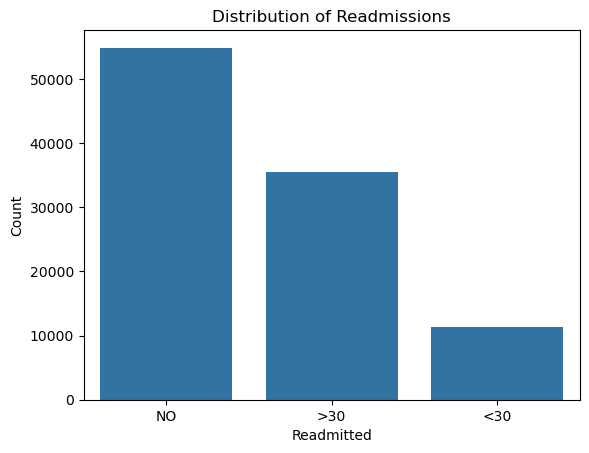

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of readmissions
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmissions')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


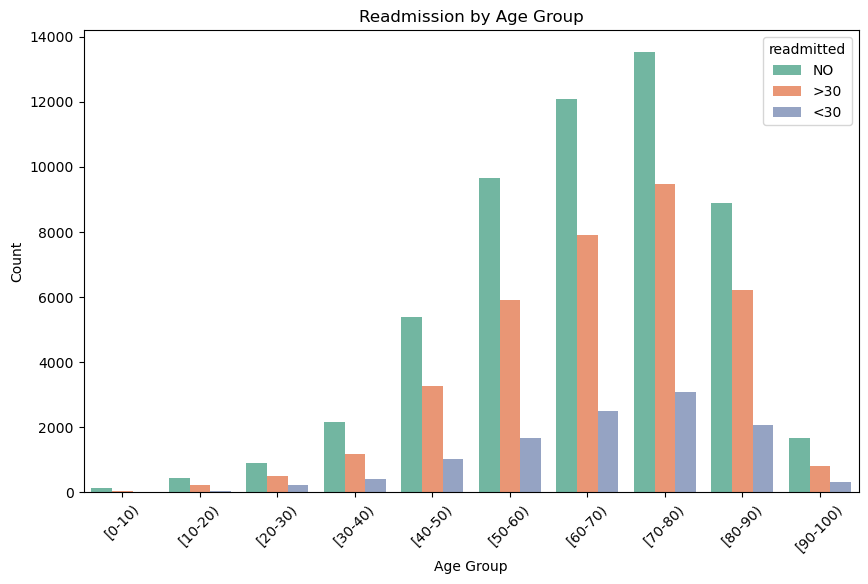

In [13]:
# Age vs Readmission
plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='readmitted', data=df, palette='Set2')
plt.title('Readmission by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


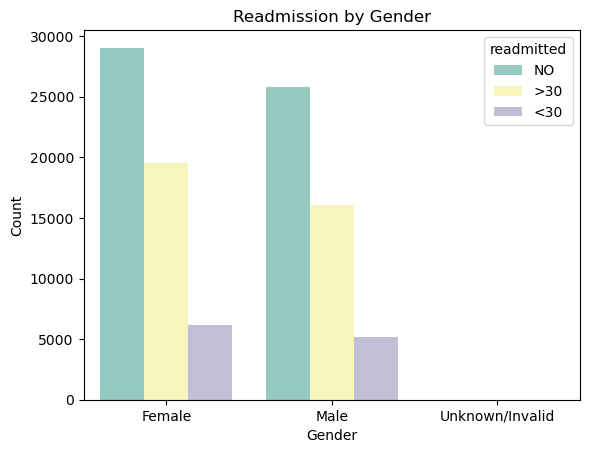

In [15]:
# Gender vs Readmission
sns.countplot(x='gender', hue='readmitted', data=df, palette='Set3')
plt.title('Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


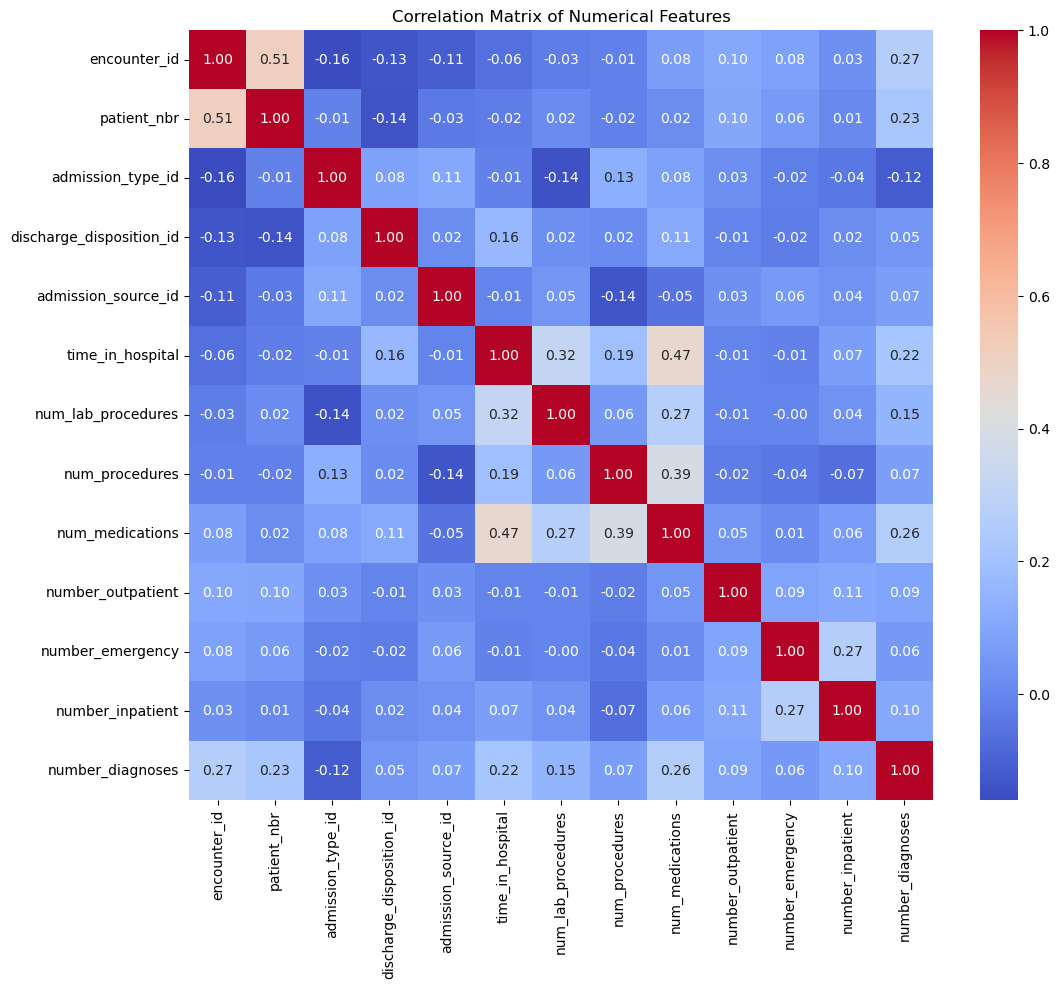

In [17]:
# Correlation Matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


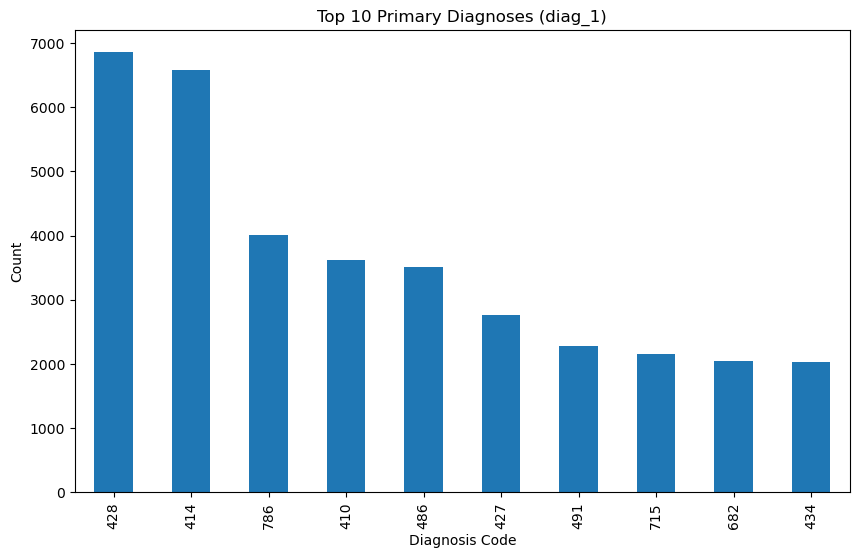

In [19]:
# Most common primary diagnoses
top_diag = df['diag_1'].value_counts().head(10)
top_diag.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Primary Diagnoses (diag_1)')
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')
plt.show()


C:\Users\Vigneshwaran\AppData\Local\Temp\ipykernel_41816\1719153395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='pastel')


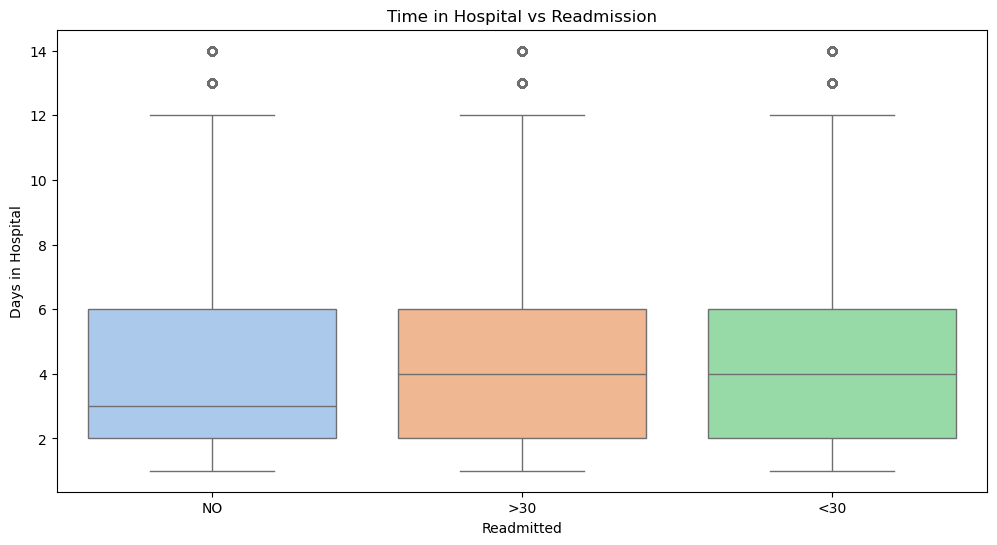

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='pastel')
plt.title('Time in Hospital vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Days in Hospital')
plt.show()


In [25]:
# Simplify target variable
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Verify distribution
print(df['readmitted_binary'].value_counts())


readmitted_binary
0    54864
1    46902
Name: count, dtype: int64


In [27]:
df.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1, inplace=True)


In [29]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify encoded dataframe
df_encoded.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,True,False,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,True,True,False,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,False,False,False,False,False,False,True


In [31]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('readmitted_binary', axis=1)
y = df_encoded['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (71236, 2428)
Testing set size: (30530, 2428)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


C:\Users\Vigneshwaran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6312151981657386
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     16459
           1       0.63      0.49      0.55     14071

    accuracy                           0.63     30530
   macro avg       0.63      0.62      0.62     30530
weighted avg       0.63      0.63      0.62     30530



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6414674091057976
              precision    recall  f1-score   support

           0       0.64      0.76      0.69     16459
           1       0.64      0.51      0.57     14071

    accuracy                           0.64     30530
   macro avg       0.64      0.63      0.63     30530
weighted avg       0.64      0.64      0.64     30530



In [37]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}



Fitting 3 folds for each of 18 candidates, totalling 54 fits


MemoryError: Unable to allocate 35.7 MiB for an array with shape (789, 47491) and data type bool

In [39]:
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select Top 50 or 100 important features
top_n = 100
top_features = X_train.columns[indices][:top_n]

# Reduce your dataset clearly:
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]


In [41]:
# Reduced grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

grid_search.fit(X_train_reduced, y_train)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_reduced)

print("Tuned Random Forest Accuracy (Reduced Features):", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Tuned Random Forest Accuracy (Reduced Features): 0.64736324926302
              precision    recall  f1-score   support

           0       0.65      0.76      0.70     16459
           1       0.65      0.51      0.57     14071

    accuracy                           0.65     30530
   macro avg       0.65      0.64      0.64     30530
weighted avg       0.65      0.65      0.64     30530



In [43]:
import joblib

joblib.dump(best_rf, "C:/Users/Vigneshwaran/Downloads/random_forest_readmission_final.pkl")

['C:/Users/Vigneshwaran/Downloads/random_forest_readmission_final.pkl']

In [45]:
# Save training and testing datasets for reproducibility
X_train_reduced.to_csv("C:/Users/Vigneshwaran/Downloads/X_train_reduced.csv", index=False)
X_test_reduced.to_csv("C:/Users/Vigneshwaran/Downloads/X_test_reduced.csv", index=False)
y_train.to_csv("C:/Users/Vigneshwaran/Downloads/y_train.csv", index=False)
y_test.to_csv("C:/Users/Vigneshwaran/Downloads/y_test.csv", index=False)
